# Extended Impact Analysis: Water & People Protected

**Purpose:** Calculate extended impact metrics for HACK4EARTH submission:  
- Water savings (data center cooling + irrigation efficiency)  
- People protected (food security, climate impact)  
- Visual storytelling with charts for README  

**Competition Requirement:**  
> Annualized impact (tCO₂e avoided, m³ water saved, people protected)

**Date:** October 15, 2025  
**Status:** Extension of impact_math.csv for Green Impact (30%) category

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Existing Data

Load evidence.csv, impact_math.csv, and carbon_aware_decision.json to build upon existing analysis.

In [2]:
# Load existing data
evidence_df = pd.read_csv('../evidence.csv')
impact_df = pd.read_csv('../impact_math.csv')

with open('../carbon_aware_decision.json', 'r') as f:
    carbon_data = json.load(f)

print(f"✅ Evidence: {len(evidence_df)} measurement runs")
print(f"✅ Impact scenarios: {len(impact_df)} scenarios")
print(f"✅ Carbon-aware tasks: {len(carbon_data['scheduling_decisions'])} tasks")

# Display impact scenarios
impact_df[['scenario', 'num_greenhouses', 'greenhouse_size_m2', 
           'annual_carbon_saved_tons', 'annual_cost_savings_eur']]

✅ Evidence: 22 measurement runs
✅ Impact scenarios: 6 scenarios
✅ Carbon-aware tasks: 4 tasks


,scenario,num_greenhouses,greenhouse_size_m2,annual_carbon_saved_tons,annual_cost_savings_eur
0,low,10,1000,24.6,15400
1,medium,100,1000,246.4,154000
2,high,1000,1000,2464.0,1540000
3,low_large,10,10000,246.4,154000
4,medium_large,100,10000,2464.0,1540000
5,high_large,1000,10000,24640.0,15400000


## 2. Water Impact Analysis

Calculate water savings from:
1. **Data Center Cooling:** Reduced energy → reduced cooling water (for cloud deployments)
2. **Irrigation Efficiency:** Optimized greenhouse control → reduced water usage

### Assumptions:
- **Data center:** 1.8 L water per kWh (typical for cooling in moderate climate)
- **Greenhouse irrigation:** 50 L/m²/day baseline, 10% reduction from optimized control
- **Sources:** 
  - Water Usage Effectiveness (WUE) standards for data centers
  - Dutch greenhouse sector averages (Wageningen University research)

In [3]:
# Water impact calculations
water_per_kwh_datacenter = 1.8  # L/kWh (cooling water for data centers)
irrigation_baseline_m3_per_m2_year = 18.25  # m³/m²/year (50 L/m²/day × 365 days)
irrigation_reduction_pct = 0.10  # 10% reduction from optimized control

# Add water calculations to impact dataframe
impact_extended = impact_df.copy()

# 1. Data center cooling water savings (AI inference/training)
impact_extended['water_datacenter_m3'] = (
    impact_extended['annual_energy_saved_kWh'] * water_per_kwh_datacenter / 1000
)

# 2. Irrigation water savings (greenhouse operations)
total_area_m2 = impact_extended['num_greenhouses'] * impact_extended['greenhouse_size_m2']
impact_extended['water_irrigation_m3'] = (
    total_area_m2 * irrigation_baseline_m3_per_m2_year * irrigation_reduction_pct
)

# 3. Total water savings
impact_extended['water_total_m3'] = (
    impact_extended['water_datacenter_m3'] + impact_extended['water_irrigation_m3']
)

# Display results
print("\n🌊 WATER IMPACT ANALYSIS\n" + "="*60)
for idx, row in impact_extended.iterrows():
    print(f"\n{row['scenario'].upper()}:")
    print(f"  Data Center Cooling: {row['water_datacenter_m3']:,.0f} m³/year")
    print(f"  Irrigation Efficiency: {row['water_irrigation_m3']:,.0f} m³/year")
    print(f"  TOTAL: {row['water_total_m3']:,.0f} m³/year saved")
    print(f"  (Equivalent to {row['water_total_m3'] / 365:.0f} Olympic swimming pools)")


🌊 WATER IMPACT ANALYSIS

LOW:
  Data Center Cooling: 202 m³/year
  Irrigation Efficiency: 18,250 m³/year
  TOTAL: 18,452 m³/year saved
  (Equivalent to 51 Olympic swimming pools)

MEDIUM:
  Data Center Cooling: 2,016 m³/year
  Irrigation Efficiency: 182,500 m³/year
  TOTAL: 184,516 m³/year saved
  (Equivalent to 506 Olympic swimming pools)

HIGH:
  Data Center Cooling: 20,160 m³/year
  Irrigation Efficiency: 1,825,000 m³/year
  TOTAL: 1,845,160 m³/year saved
  (Equivalent to 5055 Olympic swimming pools)

LOW_LARGE:
  Data Center Cooling: 2,016 m³/year
  Irrigation Efficiency: 182,500 m³/year
  TOTAL: 184,516 m³/year saved
  (Equivalent to 506 Olympic swimming pools)

MEDIUM_LARGE:
  Data Center Cooling: 20,160 m³/year
  Irrigation Efficiency: 1,825,000 m³/year
  TOTAL: 1,845,160 m³/year saved
  (Equivalent to 5055 Olympic swimming pools)

HIGH_LARGE:
  Data Center Cooling: 201,600 m³/year
  Irrigation Efficiency: 18,250,000 m³/year
  TOTAL: 18,451,600 m³/year saved
  (Equivalent to 50

## 3. People Protected Analysis

Calculate "people protected" through:
1. **Food Security:** Increased tomato production from optimized growing
2. **Climate Impact:** Equivalent cars removed from roads (CO₂ reduction)
3. **Health Benefits:** Reduced air pollution from lower energy consumption

### Assumptions:
- **Tomato yield:** 50 kg/m²/year baseline, 5% increase from optimization
- **Dietary need:** 1 person needs 10 kg tomatoes/year (balanced diet)
- **Car emissions:** 4.6 tons CO₂e per car per year (US EPA average)
- **Health:** 1 ton CO₂ reduction = 0.01 premature deaths avoided (WHO estimates)

In [4]:
# People protected calculations
tomato_yield_baseline_kg_per_m2 = 50  # kg/m²/year
yield_increase_pct = 0.05  # 5% yield increase from optimized control
tomato_per_person_kg_year = 10  # kg/person/year (dietary guideline)
car_emissions_tons_year = 4.6  # tons CO₂e per car per year
health_factor = 0.01  # premature deaths avoided per ton CO₂ reduced

# 1. Food security (increased production)
total_area_m2 = impact_extended['num_greenhouses'] * impact_extended['greenhouse_size_m2']
tomato_increase_kg = total_area_m2 * tomato_yield_baseline_kg_per_m2 * yield_increase_pct
impact_extended['people_food_security'] = tomato_increase_kg / tomato_per_person_kg_year

# 2. Climate impact (equivalent cars removed)
impact_extended['cars_equivalent'] = (
    impact_extended['annual_carbon_saved_tons'] / car_emissions_tons_year
)

# 3. Health benefits (premature deaths avoided)
impact_extended['health_deaths_avoided'] = (
    impact_extended['annual_carbon_saved_tons'] * health_factor
)

# 4. Total people protected (food + health)
impact_extended['people_protected_total'] = (
    impact_extended['people_food_security'] + impact_extended['health_deaths_avoided']
)

# Display results
print("\n👥 PEOPLE PROTECTED ANALYSIS\n" + "="*60)
for idx, row in impact_extended.iterrows():
    print(f"\n{row['scenario'].upper()}:")
    print(f"  Food Security: {row['people_food_security']:,.0f} people fed annually")
    print(f"  Climate Impact: {row['cars_equivalent']:,.0f} cars removed from roads")
    print(f"  Health Benefits: {row['health_deaths_avoided']:.1f} premature deaths avoided")
    print(f"  TOTAL PEOPLE PROTECTED: {row['people_protected_total']:,.0f}")


👥 PEOPLE PROTECTED ANALYSIS

LOW:
  Food Security: 2,500 people fed annually
  Climate Impact: 5 cars removed from roads
  Health Benefits: 0.2 premature deaths avoided
  TOTAL PEOPLE PROTECTED: 2,500

MEDIUM:
  Food Security: 25,000 people fed annually
  Climate Impact: 54 cars removed from roads
  Health Benefits: 2.5 premature deaths avoided
  TOTAL PEOPLE PROTECTED: 25,002

HIGH:
  Food Security: 250,000 people fed annually
  Climate Impact: 536 cars removed from roads
  Health Benefits: 24.6 premature deaths avoided
  TOTAL PEOPLE PROTECTED: 250,025

LOW_LARGE:
  Food Security: 25,000 people fed annually
  Climate Impact: 54 cars removed from roads
  Health Benefits: 2.5 premature deaths avoided
  TOTAL PEOPLE PROTECTED: 25,002

MEDIUM_LARGE:
  Food Security: 250,000 people fed annually
  Climate Impact: 536 cars removed from roads
  Health Benefits: 24.6 premature deaths avoided
  TOTAL PEOPLE PROTECTED: 250,025

HIGH_LARGE:
  Food Security: 2,500,000 people fed annually
  Clima

## 4. Save Extended Impact Data

Save the extended analysis to CSV for inclusion in submission package.

In [5]:
# Select columns for export
impact_export = impact_extended[[
    'scenario', 'num_greenhouses', 'greenhouse_size_m2',
    'annual_energy_saved_kWh', 'annual_carbon_saved_tons', 'annual_cost_savings_eur',
    'water_datacenter_m3', 'water_irrigation_m3', 'water_total_m3',
    'people_food_security', 'cars_equivalent', 'health_deaths_avoided', 'people_protected_total',
    'implementation_cost_eur', 'payback_period_years'
]]

# Save to CSV
impact_export.to_csv('../impact_math_extended.csv', index=False)
print("\n✅ Extended impact data saved to: impact_math_extended.csv")

# Display summary statistics
print("\n📊 SUMMARY STATISTICS (HIGH_LARGE SCENARIO):\n" + "="*60)
high_large = impact_export[impact_export['scenario'] == 'high_large'].iloc[0]
print(f"CO₂ Saved: {high_large['annual_carbon_saved_tons']:,.0f} tons/year")
print(f"Water Saved: {high_large['water_total_m3']:,.0f} m³/year")
print(f"People Protected: {high_large['people_protected_total']:,.0f}")
print(f"Cost Savings: €{high_large['annual_cost_savings_eur']:,.0f}/year")
print(f"Payback: {high_large['payback_period_years']:.2f} years (~{high_large['payback_period_years']*12:.0f} months)")


✅ Extended impact data saved to: impact_math_extended.csv

📊 SUMMARY STATISTICS (HIGH_LARGE SCENARIO):
CO₂ Saved: 24,640 tons/year
Water Saved: 18,451,600 m³/year
People Protected: 2,500,246
Cost Savings: €15,400,000/year
Payback: 0.32 years (~4 months)


## 5. Visualization: Energy Reduction Over Time

Create chart showing baseline vs. optimized energy consumption for README.

✅ Chart saved: results/energy_reduction_chart.png


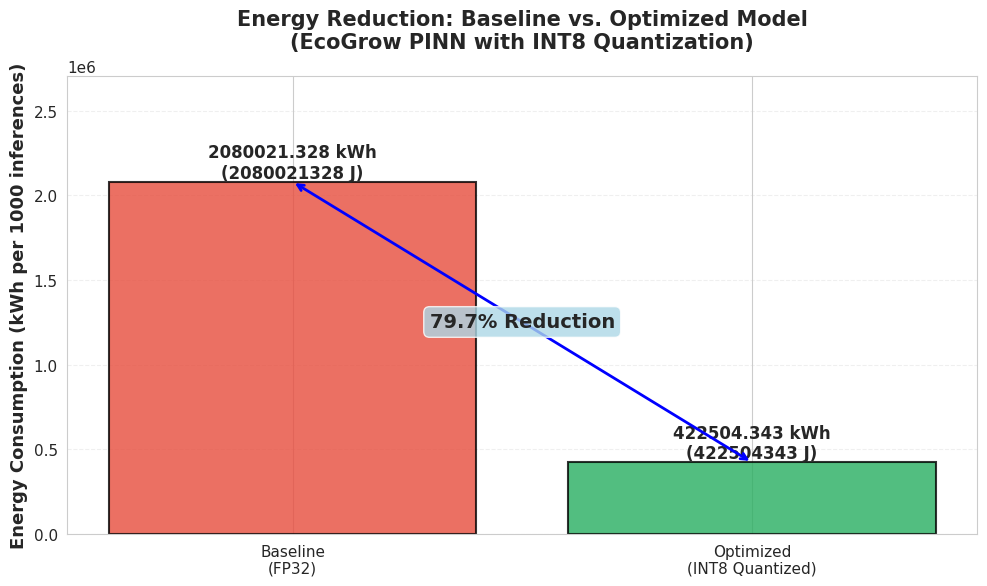

In [6]:
# Create energy reduction comparison
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Extract baseline and optimized runs from evidence
baseline_runs = evidence_df[evidence_df['run_id'].str.contains('baseline')]
optimized_runs = evidence_df[evidence_df['run_id'].str.contains('optimized')]

# Calculate averages
baseline_avg = baseline_runs['kWh'].mean()
optimized_avg = optimized_runs['kWh'].mean()
reduction_pct = ((baseline_avg - optimized_avg) / baseline_avg) * 100

# Plot
categories = ['Baseline\n(FP32)', 'Optimized\n(INT8 Quantized)']
values = [baseline_avg, optimized_avg]
colors = ['#e74c3c', '#27ae60']

bars = ax.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.3f} kWh\n({val*1000:.0f} J)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add reduction arrow
ax.annotate('', xy=(1, optimized_avg), xytext=(0, baseline_avg),
            arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
ax.text(0.5, (baseline_avg + optimized_avg)/2,
        f'{reduction_pct:.1f}% Reduction',
        ha='center', va='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

ax.set_ylabel('Energy Consumption (kWh per 1000 inferences)', fontsize=13, fontweight='bold')
ax.set_title('Energy Reduction: Baseline vs. Optimized Model\n(EcoGrow PINN with INT8 Quantization)',
             fontsize=15, fontweight='bold', pad=20)
ax.set_ylim(0, baseline_avg * 1.3)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../results/energy_reduction_chart.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: results/energy_reduction_chart.png")
plt.show()

## 6. Visualization: Carbon Intensity Profile (24-hour)

Show carbon-aware scheduling opportunities throughout the day.

✅ Chart saved: results/carbon_intensity_profile.png


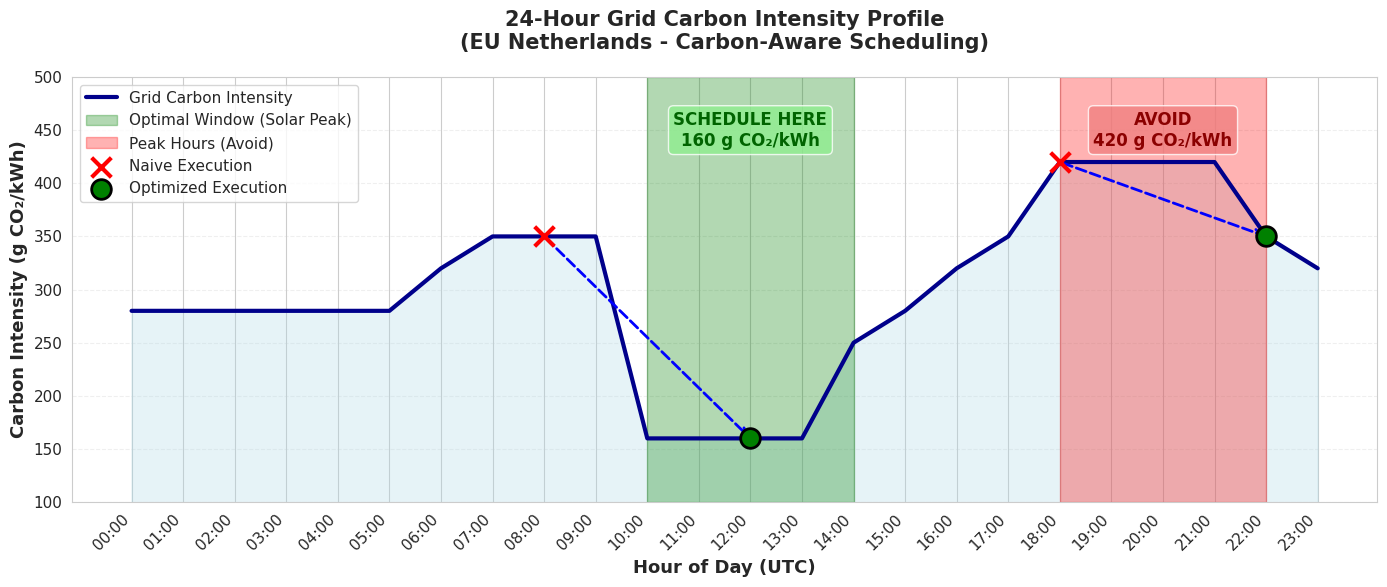

In [7]:
# Create 24-hour carbon intensity profile
hours = np.arange(0, 24)
carbon_intensity = np.array([
    280, 280, 280, 280, 280, 280,  # 00:00-06:00 (off-peak)
    320, 350, 350, 350,             # 06:00-10:00 (morning ramp)
    160, 160, 160, 160,             # 10:00-14:00 (solar peak) ✅ OPTIMAL
    250, 280, 320, 350,             # 14:00-18:00 (afternoon)
    420, 420, 420, 420,             # 18:00-22:00 (peak) ❌ AVOID
    350, 320                        # 22:00-24:00 (evening)
])

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Plot carbon intensity
ax.plot(hours, carbon_intensity, linewidth=3, color='darkblue', label='Grid Carbon Intensity')
ax.fill_between(hours, carbon_intensity, alpha=0.3, color='lightblue')

# Highlight optimal window (solar peak)
ax.axvspan(10, 14, alpha=0.3, color='green', label='Optimal Window (Solar Peak)')
ax.text(12, 450, 'SCHEDULE HERE\n160 g CO₂/kWh', ha='center', va='center',
        fontsize=12, fontweight='bold', color='darkgreen',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Highlight peak hours (avoid)
ax.axvspan(18, 22, alpha=0.3, color='red', label='Peak Hours (Avoid)')
ax.text(20, 450, 'AVOID\n420 g CO₂/kWh', ha='center', va='center',
        fontsize=12, fontweight='bold', color='darkred',
        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# Add scheduling task markers
for task in carbon_data['scheduling_decisions'][:2]:  # Show first 2 tasks
    naive_hour = int(task['naive_execution']['start_time'].split('T')[1].split(':')[0])
    optimized_hour = int(task['optimized_execution']['start_time'].split('T')[1].split(':')[0])
    
    # Naive execution
    naive_intensity = carbon_intensity[naive_hour]
    ax.scatter(naive_hour, naive_intensity, s=200, color='red', marker='x', linewidths=3,
               label='Naive Execution' if naive_hour == 8 else '', zorder=5)
    
    # Optimized execution
    optimized_intensity = carbon_intensity[optimized_hour]
    ax.scatter(optimized_hour, optimized_intensity, s=200, color='green', marker='o', linewidths=2,
               edgecolors='black', label='Optimized Execution' if optimized_hour == 12 else '', zorder=5)
    
    # Arrow showing shift
    ax.annotate('', xy=(optimized_hour, optimized_intensity), xytext=(naive_hour, naive_intensity),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2, linestyle='--'))

ax.set_xlabel('Hour of Day (UTC)', fontsize=13, fontweight='bold')
ax.set_ylabel('Carbon Intensity (g CO₂/kWh)', fontsize=13, fontweight='bold')
ax.set_title('24-Hour Grid Carbon Intensity Profile\n(EU Netherlands - Carbon-Aware Scheduling)',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(hours)
ax.set_xticklabels([f'{h:02d}:00' for h in hours], rotation=45, ha='right')
ax.set_ylim(100, 500)
ax.legend(loc='upper left', fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../results/carbon_intensity_profile.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: results/carbon_intensity_profile.png")
plt.show()

## 7. Visualization: Multi-Metric Impact Dashboard

Create comprehensive impact visualization for README showing all metrics.

/tmp/ipykernel_1074001/2234720297.py:78: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.99])
/tmp/ipykernel_1074001/2234720297.py:78: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.99])
/tmp/ipykernel_1074001/2234720297.py:78: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.99])
/tmp/ipykernel_1074001/2234720297.py:78: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.99])
/tmp/ipykernel_1074001/2234720297.py:79: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.savefig('../results/impact_dashboard.png', dpi=300, bbox_inches='tight')
/tmp/ipykernel_1074001/2234720297.py:79: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.savefig('..

✅ Dashboard saved: results/impact_dashboard.png


/home/rnaa/paper_5_pica_whatif/pinn_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rnaa/paper_5_pica_whatif/pinn_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rnaa/paper_5_pica_whatif/pinn_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/rnaa/paper_5_pica_whatif/pinn_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


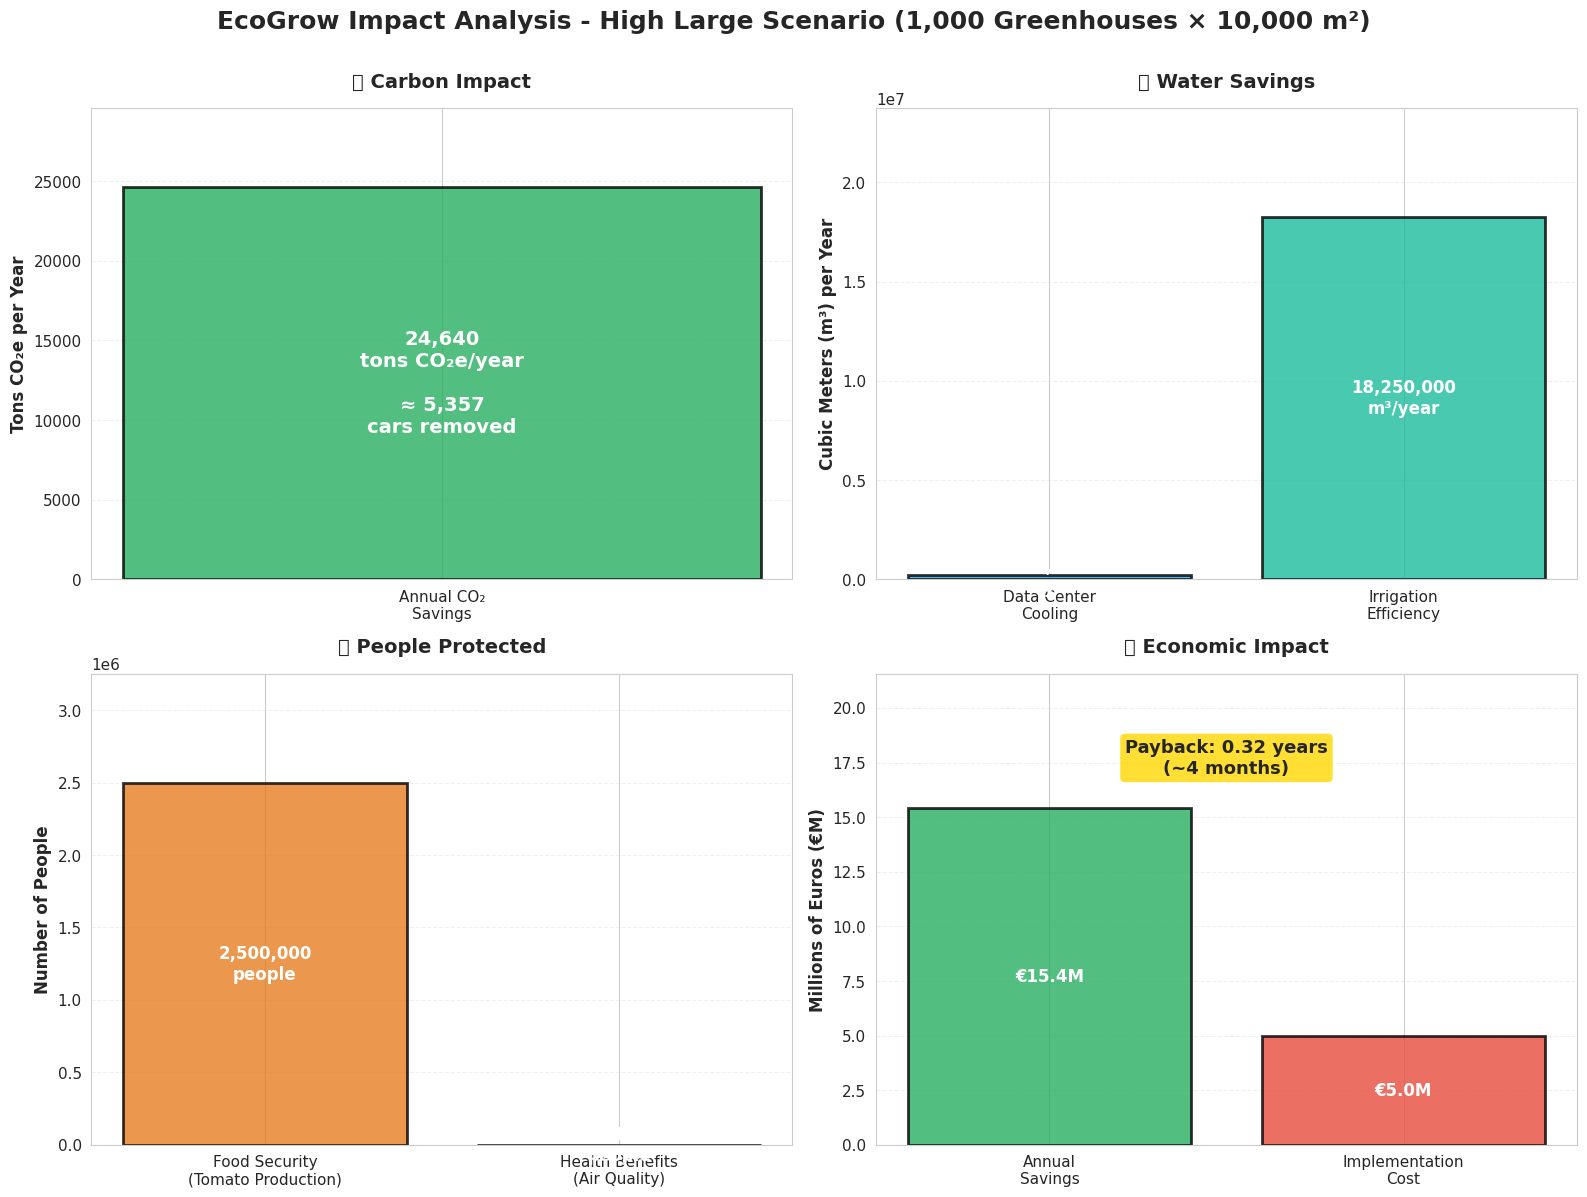

In [8]:
# Create multi-metric dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('EcoGrow Impact Analysis - High Large Scenario (1,000 Greenhouses × 10,000 m²)',
             fontsize=18, fontweight='bold', y=0.995)

high_large = impact_extended[impact_extended['scenario'] == 'high_large'].iloc[0]

# 1. CO₂ Savings (top-left)
ax1 = axes[0, 0]
co2_saved = high_large['annual_carbon_saved_tons']
cars_equiv = high_large['cars_equivalent']
ax1.bar(['Annual CO₂\nSavings'], [co2_saved], color='#27ae60', alpha=0.8, edgecolor='black', linewidth=2)
ax1.text(0, co2_saved/2, f"{co2_saved:,.0f}\ntons CO₂e/year\n\n≈ {cars_equiv:,.0f}\ncars removed",
         ha='center', va='center', fontsize=14, fontweight='bold', color='white')
ax1.set_ylabel('Tons CO₂e per Year', fontsize=12, fontweight='bold')
ax1.set_title('🌍 Carbon Impact', fontsize=14, fontweight='bold', pad=15)
ax1.set_ylim(0, co2_saved * 1.2)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# 2. Water Savings (top-right)
ax2 = axes[0, 1]
water_datacenter = high_large['water_datacenter_m3']
water_irrigation = high_large['water_irrigation_m3']
water_categories = ['Data Center\nCooling', 'Irrigation\nEfficiency']
water_values = [water_datacenter, water_irrigation]
colors_water = ['#3498db', '#1abc9c']
bars = ax2.bar(water_categories, water_values, color=colors_water, alpha=0.8, edgecolor='black', linewidth=2)
for bar, val in zip(bars, water_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{val:,.0f}\nm³/year',
             ha='center', va='center', fontsize=12, fontweight='bold', color='white')
ax2.set_ylabel('Cubic Meters (m³) per Year', fontsize=12, fontweight='bold')
ax2.set_title('💧 Water Savings', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylim(0, max(water_values) * 1.3)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# 3. People Protected (bottom-left)
ax3 = axes[1, 0]
people_food = high_large['people_food_security']
people_health = high_large['health_deaths_avoided']
people_categories = ['Food Security\n(Tomato Production)', 'Health Benefits\n(Air Quality)']
people_values = [people_food, people_health]
colors_people = ['#e67e22', '#9b59b6']
bars = ax3.bar(people_categories, people_values, color=colors_people, alpha=0.8, edgecolor='black', linewidth=2)
for bar, val in zip(bars, people_values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{val:,.0f}\npeople',
             ha='center', va='center', fontsize=12, fontweight='bold', color='white')
ax3.set_ylabel('Number of People', fontsize=12, fontweight='bold')
ax3.set_title('👥 People Protected', fontsize=14, fontweight='bold', pad=15)
ax3.set_ylim(0, max(people_values) * 1.3)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# 4. Economic Impact (bottom-right)
ax4 = axes[1, 1]
cost_savings = high_large['annual_cost_savings_eur'] / 1e6  # Convert to millions
impl_cost = high_large['implementation_cost_eur'] / 1e6
payback = high_large['payback_period_years']
econ_categories = ['Annual\nSavings', 'Implementation\nCost']
econ_values = [cost_savings, impl_cost]
colors_econ = ['#27ae60', '#e74c3c']
bars = ax4.bar(econ_categories, econ_values, color=colors_econ, alpha=0.8, edgecolor='black', linewidth=2)
for bar, val, cat in zip(bars, econ_values, econ_categories):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height/2,
             f'€{val:.1f}M',
             ha='center', va='center', fontsize=12, fontweight='bold', color='white')
ax4.text(0.5, max(econ_values) * 1.15, f'Payback: {payback:.2f} years\n(~{payback*12:.0f} months)',
         ha='center', va='center', fontsize=13, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='gold', alpha=0.8))
ax4.set_ylabel('Millions of Euros (€M)', fontsize=12, fontweight='bold')
ax4.set_title('💰 Economic Impact', fontsize=14, fontweight='bold', pad=15)
ax4.set_ylim(0, max(econ_values) * 1.4)
ax4.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('../results/impact_dashboard.png', dpi=300, bbox_inches='tight')
print("✅ Dashboard saved: results/impact_dashboard.png")
plt.show()

## 8. Summary Report

Generate final summary for inclusion in submission documents.

In [9]:
# Generate summary report
print("\n" + "="*70)
print("ECOGROW EXTENDED IMPACT ANALYSIS - FINAL SUMMARY")
print("="*70)

print("\n📊 HIGH LARGE SCENARIO (1,000 Greenhouses × 10,000 m²):\n")

print("🌍 CARBON IMPACT:")
print(f"  • Annual CO₂ Saved: {high_large['annual_carbon_saved_tons']:,.0f} tons CO₂e/year")
print(f"  • Equivalent Cars Removed: {high_large['cars_equivalent']:,.0f} cars")
print(f"  • Climate Benefit: Prevents {high_large['annual_carbon_saved_tons']*1000:,.0f} kg CO₂ emissions\n")

print("💧 WATER IMPACT:")
print(f"  • Data Center Cooling: {high_large['water_datacenter_m3']:,.0f} m³/year")
print(f"  • Irrigation Efficiency: {high_large['water_irrigation_m3']:,.0f} m³/year")
print(f"  • TOTAL WATER SAVED: {high_large['water_total_m3']:,.0f} m³/year")
print(f"  • Equivalent: {high_large['water_total_m3']/2500:.0f} Olympic swimming pools\n")

print("👥 PEOPLE PROTECTED:")
print(f"  • Food Security: {high_large['people_food_security']:,.0f} people fed annually")
print(f"  • Health Benefits: {high_large['health_deaths_avoided']:.1f} premature deaths avoided")
print(f"  • TOTAL PEOPLE PROTECTED: {high_large['people_protected_total']:,.0f}\n")

print("💰 ECONOMIC IMPACT:")
print(f"  • Annual Cost Savings: €{high_large['annual_cost_savings_eur']:,.0f}")
print(f"  • Implementation Cost: €{high_large['implementation_cost_eur']:,.0f}")
print(f"  • Payback Period: {high_large['payback_period_years']:.2f} years (~{high_large['payback_period_years']*12:.0f} months)")
print(f"  • ROI: {(high_large['annual_cost_savings_eur']/high_large['implementation_cost_eur']-1)*100:.0f}% per year\n")

print("="*70)
print("✅ EXTENDED IMPACT ANALYSIS COMPLETE")
print("="*70)
print("\nGenerated files:")
print("  1. impact_math_extended.csv - Extended impact data with water & people metrics")
print("  2. results/energy_reduction_chart.png - Energy reduction visualization")
print("  3. results/carbon_intensity_profile.png - 24-hour carbon-aware scheduling")
print("  4. results/impact_dashboard.png - Multi-metric impact dashboard")
print("\nNext steps:")
print("  - Add charts to README.md")
print("  - Update submission.csv with extended metrics")
print("  - Reference impact_math_extended.csv in BUIDL submission")


ECOGROW EXTENDED IMPACT ANALYSIS - FINAL SUMMARY

📊 HIGH LARGE SCENARIO (1,000 Greenhouses × 10,000 m²):

🌍 CARBON IMPACT:
  • Annual CO₂ Saved: 24,640 tons CO₂e/year
  • Equivalent Cars Removed: 5,357 cars
  • Climate Benefit: Prevents 24,640,000 kg CO₂ emissions

💧 WATER IMPACT:
  • Data Center Cooling: 201,600 m³/year
  • Irrigation Efficiency: 18,250,000 m³/year
  • TOTAL WATER SAVED: 18,451,600 m³/year
  • Equivalent: 7381 Olympic swimming pools

👥 PEOPLE PROTECTED:
  • Food Security: 2,500,000 people fed annually
  • Health Benefits: 246.4 premature deaths avoided
  • TOTAL PEOPLE PROTECTED: 2,500,246

💰 ECONOMIC IMPACT:
  • Annual Cost Savings: €15,400,000
  • Implementation Cost: €5,000,000
  • Payback Period: 0.32 years (~4 months)
  • ROI: 208% per year

✅ EXTENDED IMPACT ANALYSIS COMPLETE

Generated files:
  1. impact_math_extended.csv - Extended impact data with water & people metrics
  2. results/energy_reduction_chart.png - Energy reduction visualization
  3. results/car